In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [2]:
df = pd.read_csv("IMDB Dataset.csv")

nltk.download("stopwords")

ps = PorterStemmer()

[nltk_data] Downloading package stopwords to /Users/ambuj/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
df.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
data = []
for i in range(df.shape[0]):
    desc = df["review"][i]
    desc = re.sub('[^a-zA-Z]',' ',desc)
    desc = desc.lower()
    desc = desc.split()
    desc = [ps.stem(word) for word in desc if not word in set(stopwords.words('english'))]
    desc = ' '.join(desc)
    data.append(desc)
    if(i%10000==0):
        print(i)

0
10000
20000
30000
40000


In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
x = cv.fit_transform(data).toarray()
x[0]

array([0, 0, 0, ..., 0, 0, 0])

In [7]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(df['sentiment'])
y = lab_enc.transform(df['sentiment'])
y

array([1, 1, 1, ..., 0, 0, 0])

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 0)

In [9]:
x_train.shape

(40000, 5000)

In [10]:
x_test.shape

(10000, 5000)

In [11]:
y_train.shape

(40000,)

In [12]:
y_test.shape

(10000,)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [16]:
model =  Sequential()

In [17]:
model.add(Dense(units = 1565,kernel_initializer = "GlorotNormal",activation= "relu"))
model.add(Dense(units = 2000,kernel_initializer = "GlorotNormal",activation= "relu"))
model.add(Dense(units = 2000,kernel_initializer = "GlorotNormal",activation= "relu"))
model.add(Dense(units = 1,kernel_initializer = "GlorotNormal",activation= "sigmoid"))

In [18]:
model.compile(optimizer = "rmsprop",loss = "binary_crossentropy",metrics = ["accuracy"])

In [19]:
history = model.fit(x_train,y_train,epochs=5,validation_data=(x_test, y_test))

Train on 40000 samples, validate on 10000 samples
Epoch 1/5
40000/40000 [==============================] - 147s 4ms/sample - loss: 0.3627 - accuracy: 0.8640 - val_loss: 0.2962 - val_accuracy: 0.8786
Epoch 2/5
40000/40000 [==============================] - 151s 4ms/sample - loss: 0.2606 - accuracy: 0.9068 - val_loss: 0.3277 - val_accuracy: 0.8851
Epoch 3/5
40000/40000 [==============================] - 165s 4ms/sample - loss: 0.2249 - accuracy: 0.9259 - val_loss: 0.3295 - val_accuracy: 0.8850
Epoch 4/5
40000/40000 [==============================] - 165s 4ms/sample - loss: 0.1852 - accuracy: 0.9458 - val_loss: 0.3288 - val_accuracy: 0.8840
Epoch 5/5
40000/40000 [==============================] - 166s 4ms/sample - loss: 0.1447 - accuracy: 0.9618 - val_loss: 0.6501 - val_accuracy: 0.8752


In [20]:
test_pred = model.predict(x_test)
test_pred = test_pred>0.5

In [21]:
test_pred

array([[ True],
       [False],
       [ True],
       ...,
       [ True],
       [False],
       [False]])

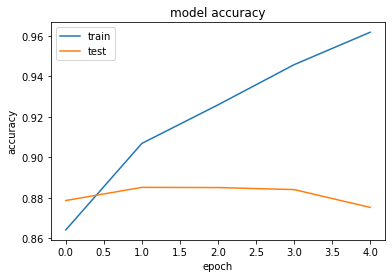

In [22]:
import matplotlib.pyplot as plt

#Model Accuracy Plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

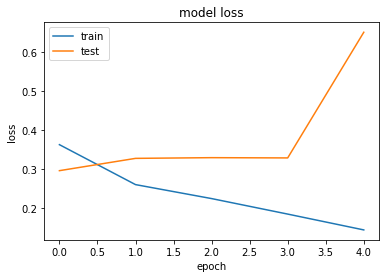

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [113]:
def pred(model,text):
    text = re.sub('[^a-zA-Z]', ' ',text)
    text = text.lower()
    text = text.split()
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
    text = ' '.join(text)
    p = model.predict(cv.transform([text]))
    if(p>0.5):
        return 'Positive'
    else:
        return 'Negative'

In [114]:
pred(model,'Awesome food, great ambiance ans the service was decent')

'Positive'

In [115]:
pred(model,'Worst service...would not recommend')

'Negative'